In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
df = sns.load_dataset('tips')

In [10]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [29]:
x = df.sex.value_counts().keys().to_numpy()
y = df.sex.value_counts().to_numpy()

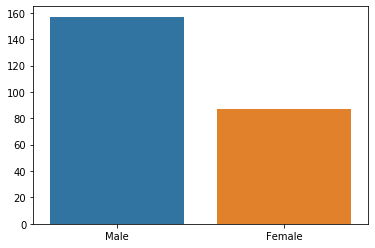

In [36]:
sns.barplot(x= x, y= y)

In [44]:
 series = pd.Series(data= np.arange(1, 6), index= list('abcde'), name = 'example')

In [40]:
series

a    1
b    2
c    3
d    4
e    5
Name: example, dtype: int32

In [77]:
dff = pd.DataFrame(series)

In [47]:
df

,example
a,1
b,2
c,3
d,4
e,5


In [48]:
series.c

3

In [49]:
series['c']

3

In [50]:
for i in series:
    print(i)

1
2
3
4
5


In [56]:
aa = series.index.to_numpy

In [57]:
aa

<bound method IndexOpsMixin.to_numpy of Index(['a', 'b', 'c', 'd', 'e'], dtype='object')>

In [59]:
bb = series.keys().to_numpy()

In [60]:
bb

array(['a', 'b', 'c', 'd', 'e'], dtype=object)

In [65]:
series.values

array([1, 2, 3, 4, 5])

In [66]:
df

,example
a,1
b,2
c,3
d,4
e,5


In [110]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [74]:
df.sex == 'Male'

0      False
1       True
2       True
3       True
4      False
       ...  
239     True
240    False
241     True
242     True
243    False
Name: sex, Length: 244, dtype: bool

In [82]:
df.loc[2]

total_bill     21.01
tip              3.5
sex             Male
smoker            No
day              Sun
time          Dinner
size               3
Name: 2, dtype: object

In [80]:
dff.loc[[True, True, False, False, True]]

,example
a,1
b,2
e,5


In [92]:
df[['tip', 'day']]

,tip,day
0,1.01,Sun
1,1.66,Sun
2,3.50,Sun
3,3.31,Sun
4,3.61,Sun
...,...,...
239,5.92,Sat
240,2.00,Sat
241,2.00,Sat
242,1.75,Sat


In [183]:
mul_df = df.groupby(['sex', 'smoker']).agg({'tip' : 'mean'})


mul_df

In [152]:
mul_df.loc[('Male', 'Yes'):('Female', 'Yes'),'tip']

sex     smoker
Male    Yes       3.051167
        No        3.113402
Female  Yes       2.931515
Name: tip, dtype: float64

In [109]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [198]:
j = mul_df.reset_index(level= 0)

In [188]:
mul_df.reset_index()

,sex,smoker,tip
0,Male,Yes,3.051167
1,Male,No,3.113402
2,Female,Yes,2.931515
3,Female,No,2.773519


In [199]:
j.loc['Yes']

,sex,tip
smoker,,
Yes,Male,3.051167
Yes,Female,2.931515


In [180]:
mul_df

In [202]:
df.set_index(['sex', 'smoker'])

total_bill   tip   day    time  size
sex    smoker                                      
Female No           16.99  1.01   Sun  Dinner     2
Male   No           10.34  1.66   Sun  Dinner     3
       No           21.01  3.50   Sun  Dinner     3
       No           23.68  3.31   Sun  Dinner     2
Female No           24.59  3.61   Sun  Dinner     4
...                   ...   ...   ...     ...   ...
Male   No           29.03  5.92   Sat  Dinner     3
Female Yes          27.18  2.00   Sat  Dinner     2
Male   Yes          22.67  2.00   Sat  Dinner     2
       No           17.82  1.75   Sat  Dinner     2
Female No           18.78  3.00  Thur  Dinner     2

[244 rows x 5 columns]

In [203]:
mul_df

tip
sex    smoker          
Male   Yes     3.051167
       No      3.113402
Female Yes     2.931515
       No      2.773519

In [212]:
np.random.seed()

In [222]:
sum(np.random.binomial(7, 0.8, 10) == 7) / 10

0.1

In [218]:
10_000

10000

In [223]:
from scipy import stats

In [262]:
stats.binom.pmf(k= 2, n = 10, p = 0.5)

0.04394531249999999

In [263]:
stats.binom.cdf(k= 2, n = 10, p = 0.5)

0.054687500000000014

In [264]:
stats.binom.pmf(k= 1, n = 10, p = 0.5)

0.00976562500000001

In [265]:
0.00976562500000001 + 0.04394531249999999

0.0537109375

In [266]:
x = np.random.binomial(6, 0.5, 1000)

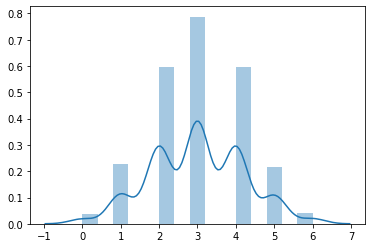

In [267]:
sns.distplot(x)

In [270]:
yy= stats.binom.cdf(x, n= 1000, p= 0.5)

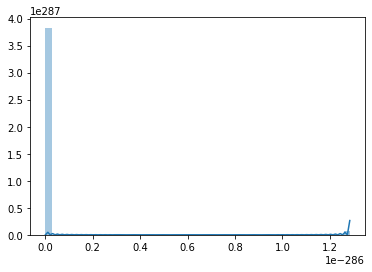

In [271]:
sns.distplot(yy)

In [286]:
def ecdf(data):
    
    n = len(data)
    x = np.sort(data)
    
    y = np.arange(1, n+1) / n
    #display(y)
    
    return x, y


In [276]:
x_flips, y_flips = ecdf(x)

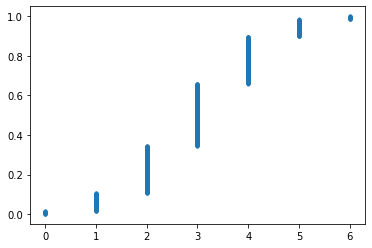

In [282]:
plt.plot(x_flips, y_flips, marker='.', linestyle= 'none')

In [294]:
name = 'selim salm tomay sali sali tom si'
name.count('s')

5

In [296]:
from collections import Counter

In [297]:
Counter(name)

Counter({'s': 5,
         'e': 1,
         'l': 4,
         'i': 4,
         'm': 4,
         ' ': 6,
         'a': 4,
         't': 2,
         'o': 2,
         'y': 1})

In [298]:
Counter({'red': 4, 'blue': 2}) 

Counter({'red': 4, 'blue': 2})

In [300]:
a = np.random.random(size= 10)


In [307]:
a

array([0.38283932, 0.855967  , 0.59318327, 0.22558044, 0.76970766,
       0.55351674, 0.49713493, 0.68024259, 0.75924098, 0.43432838])

In [317]:
sum(a>0.5)

6